In [36]:
import pandas as pd
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt

# Open the zip file
with zipfile.ZipFile(r'C:\Users\sulek\Downloads\titanic.zip', 'r') as zip_ref:
    # Extract the desired csv file (in this case, 'train.csv')
    zip_ref.extract('train.csv', r'C:\Users\sulek\Downloads')

# Load the extracted CSV file
titanic_data = pd.read_csv(r'C:\Users\sulek\Downloads\train.csv')

# Display the first few rows of the DataFrame
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
titanic_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [41]:
median_age = titanic_data['Age'].median()
titanic_data['Age'] = titanic_data['Age'].fillna(median_age)

In [42]:
titanic_data.dropna(subset=['Cabin'], inplace=True)

<Axes: xlabel='Survived', ylabel='count'>

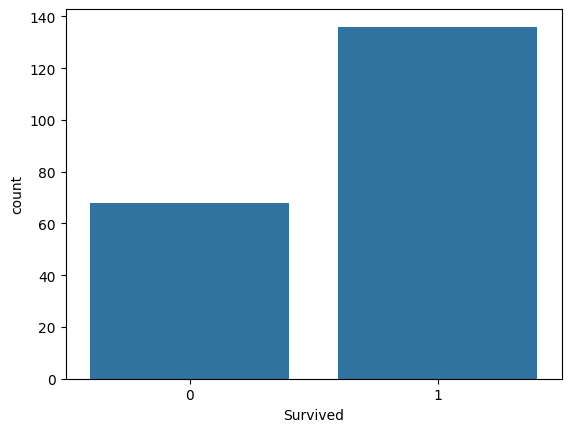

In [43]:
sns.countplot(x='Survived', data=titanic_data)

In [45]:
titanic_data['Age_group'] = pd.cut(titanic_data['Age'], bins=[0, 12, 18, 35, 60, np.inf], labels=['Child', 'Teenager', 'Young Adult', 'Middle Age', 'Senior'])

<Axes: xlabel='Age_group', ylabel='count'>

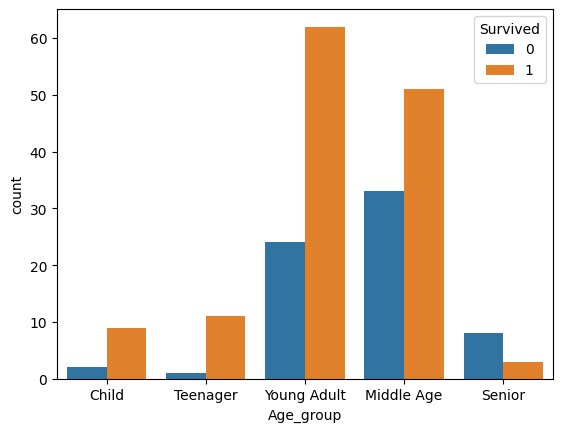

In [47]:
sns.countplot(x='Age_group', hue='Survived', data=titanic_data)

<Axes: >

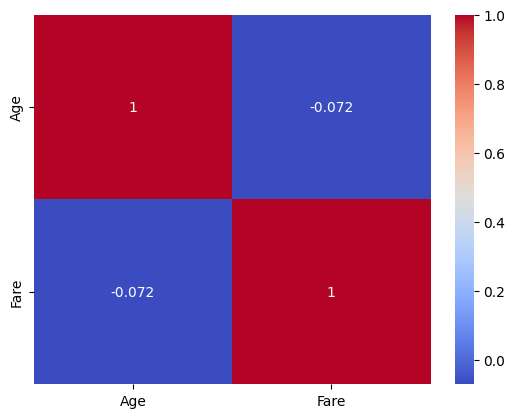

In [49]:
sns.heatmap(titanic_data[['Age', 'Fare']].corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='Survived', ylabel='Fare'>

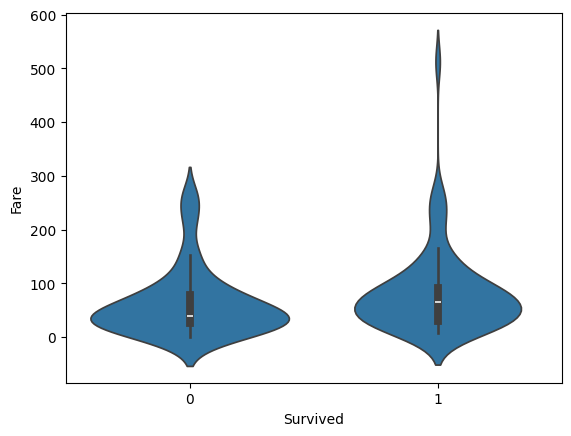

In [51]:
sns.violinplot(x='Survived', y='Fare', data=titanic_data)